In [ ]:
###submitted by 
# ASHIQ PUTHIYAVEETTIL ASHRAF 
# DARSHAN SIVA KUMAR 

In [3]:
import pandas as pd
import numpy as np
import spacy
import html
import re 
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)

from sklearn.svm import SVC  # SVM model
from sklearn.neural_network import MLPClassifier  # Neural network model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,

)

from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

nlp = spacy.load("en_core_web_lg")



1.4.0


In [4]:
path = "C:\\Users\\Ashiq\\Documents\\Documents\\NLP\\train.2csv\\train.csv"
df = pd.read_csv(path)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
(df
     .groupby("class")
     .agg(
        hate_speech_count=("hate_speech_count", "mean"),
        offensive_language_count=("offensive_language_count", "mean"),
        neither_count=("neither_count", "mean"),
     )
     .round(1)
)

,hate_speech_count,offensive_language_count,neither_count
class,,,
0,2.3,0.8,0.1
1,0.2,3.0,0.1
2,0.1,0.3,2.8


In [6]:
df = (df
    .drop(columns=["count", "hate_speech_count", "offensive_language_count", "neither_count"])
)
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df["class"].value_counts(dropna=False, normalize=True).sort_index()

class
0    0.057701
1    0.774321
2    0.167978
Name: proportion, dtype: float64

In [8]:


df = (df
    .assign(
        class_=df["class"].map({
            0:1,
            1:1,
            2:0
        })
    )
    .drop(columns=["class"])
    .rename(columns={"class_": "class"})
)

df["class"].value_counts(dropna=False, normalize=True).sort_index()

class
0    0.167978
1    0.832022
Name: proportion, dtype: float64

In [9]:
class_map = {
    0: "neutral", 
    1: "offensive and hate speech"
}

In [10]:
# Check for NaN values in the 'tweet' column
nan_tweets = df[df['tweet'].isna()]
print(nan_tweets)


Empty DataFrame
Columns: [tweet, class]
Index: []


In [11]:
import pandas as pd
import re
import spacy
import html

# Load SpaCy model
nlp = spacy.load("en_core_web_lg")

# Define functions for preprocessing
def remove_urls(text):
    """Remove URLs from string."""
    pattern = re.compile(r"https?://\S+|www\.\S+")
    return pattern.sub("", text)

def remove_twitter_handles(text):
    """Remove Twitter handles from string."""
    pattern = re.compile(r"@[\w]+")
    return pattern.sub("", text)

def remove_twitter_rt(text):
    """Remove Twitter RTs from string."""
    pattern = re.compile(r"\bRT\b")
    return pattern.sub("", text)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"ain\'t", "are not", phrase)
    phrase = re.sub(r"shan\'t", "shall not", phrase)
    phrase = re.sub(r"ma\'am", "maam", phrase)
    phrase = re.sub(r"y\'all", "you all", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Define functions for SpaCy-based preprocessing
def preprocess_text_spacy(text):
    # Remove URLs, Twitter handles, and RTs
    text = remove_urls(text)
    text = remove_twitter_handles(text)
    text = remove_twitter_rt(text)
    
    # Apply SpaCy tokenization
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    
    # Decontract words
    tokens = [decontracted(word) for word in tokens]
    
    return tokens

# Sample DataFrame creation for demonstration; replace with your actual DataFrame
# df = pd.DataFrame({'tweet': ['Sample tweet 1', 'Sample tweet 2', ...]})

# Take a random sample of 500 rows from the DataFrame
sample_df = df.sample(n=2000, random_state=1)

# Apply SpaCy-based preprocessing to tweets
sample_df['tweet_clean'] = sample_df['tweet'].apply(preprocess_text_spacy)

sample_df.sample(5)


,tweet,class,tweet_clean
23962,http://t.co/bPU86qzYFt Lola Foxx &#8211; Nubil...,1,"[ , lola, foxx, nubile, co, ed, show, pink, pu..."
24753,you ain't gotta be a dyke to like hoes,1,"[be, get, to, dyke, like, hoe]"
10599,I just wanna get lifted &amp; fuck exotic bitc...,1,"[wanna, lift, amp, fuck, exotic, bitch]"
1636,&#8220;@_CiaraaaS: What things do you love? &#...,1,"[thing, love, , weed, pussy, life]"
7419,A bitch will be quick to get mad if they have ...,1,"[bitch, quick, mad, write, essay, post, tweet,..."


In [12]:
y = sample_df["class"].values
x = sample_df["tweet_clean"].values
x = [(" ").join(doc) for  doc in x]

x = np.asarray(x)
y = np.asarray(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.1, random_state=8)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

1800 1800
200 200


In [13]:
def return_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0.0)
    recall = recall_score(y_true, y_pred, average="weighted")
    matrix = confusion_matrix(y_true, y_pred, normalize="true")
    Scores = namedtuple("Scores", ["acc", "f1", "precision", "recall", "matrix"])
    return Scores(acc, f1, precision, recall, matrix)

In [14]:


# Assuming x_train, y_train are defined somewhere in your code.
# Define a function to calculate and return the scores
def return_score(y_true, y_pred):
    return {
        'acc': accuracy_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted')
    }

# Replace LogisticRegression and XGBClassifier with SVC and MLPClassifier
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(kernel='linear', probability=True)  # For SVM model
mlp = MLPClassifier(max_iter=1000)  # For neural network model

models = [
    dt,
    rf,
    svc,
    mlp,
]

for model in models:
    model_name = model.__class__.__name__
    model_scores = []

    print(model_name)
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=8)
    for i, (train_index, val_index) in enumerate(skf.split(x_train, y_train)):

        print(f"\tFold {i}")

        # Create train and val subset
        x_train_count = x_train[train_index]
        y_train_count = y_train[train_index]
        x_val_count = x_train[val_index]
        y_val_count = y_train[val_index]
        
        # Oversample minority class in train set to deal with class imbalance
        ros = RandomOverSampler(random_state=42)
        x_train_count, y_train_count = ros.fit_resample(x_train_count.reshape(-1, 1), y_train_count)
        x_train_count = x_train_count.flatten()
        
        # Vectorize
        vectorizer = CountVectorizer() #BOW
        x_train_count = vectorizer.fit_transform(x_train_count)
        x_val_count = vectorizer.transform(x_val_count)
            
        # Fit and predict
        model.fit(x_train_count, y_train_count)
        y_pred = model.predict(x_val_count)
        scores_this_fold = return_score(y_val_count, y_pred)
        model_scores.append(scores_this_fold)

    # Calculate and print scores
    mean_scores = {metric: np.mean([score[metric] for score in model_scores]) for metric in model_scores[0]}
    print(f"\tAcc: {mean_scores['acc']:.5f} | F1: {mean_scores['f1']:.5f} | Precision: {mean_scores['precision']:.5f} | Recall: {mean_scores['recall']:.5f}")


DecisionTreeClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc: 0.92278 | F1: 0.92001 | Precision: 0.92092 | Recall: 0.92278
RandomForestClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc: 0.93167 | F1: 0.92838 | Precision: 0.93007 | Recall: 0.93167
SVC
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc: 0.93222 | F1: 0.93126 | Precision: 0.93110 | Recall: 0.93222
MLPClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc: 0.91611 | F1: 0.91158 | Precision: 0.91258 | Recall: 0.91611


In [15]:
from sklearn.pipeline import Pipeline


In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Assuming x_train, y_train, x_test, y_test are already defined

# Vectorize the input data
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
# You would also transform your validation/test set here

# Define a hyperparameter exploration function for multiple models
def explore_hyperparameters(models_params, x_train, y_train):
    best_scores = {}
    for model_name, (model, param_grid) in models_params.items():
        best_score = 0
        best_params = {}
        for params in param_grid:
            model.set_params(**params)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_train)  # In practice, you should validate on a separate set
            score = accuracy_score(y_train, y_pred)  # Consider using a more robust metric or validation strategy
            if score > best_score:
                best_score = score
                best_params = params
        best_scores[model_name] = (best_score, best_params)
    return best_scores

# Hyperparameters to test for each model
models_params = {
    "SVC": (SVC(), [
        {'C': 1, 'kernel': 'linear'},
        {'C': 0.5, 'kernel': 'linear'},
        # Add more parameter combinations if needed
    ]),
    "MLPClassifier": (MLPClassifier(max_iter=1000), [
        {'hidden_layer_sizes': (100,), 'activation': 'relu'},
        {'hidden_layer_sizes': (50,), 'activation': 'relu'},
        # Add more parameter combinations if needed
    ]),
    "RandomForestClassifier": (RandomForestClassifier(), [
        {'n_estimators': 100},
        {'n_estimators': 200},
        # Add more parameter combinations if needed
    ]),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), [
        {'max_depth': None},
        {'max_depth': 10},
        # Add more parameter combinations if needed
    ]),
    # Add other models and their hyperparameters here
}

# Explore hyperparameters for all models
best_scores = explore_hyperparameters(models_params, x_train_vectorized, y_train)

# Print the best scores and parameters for each model
for model_name, (score, params) in best_scores.items():
    print(f"{model_name} Best Score: {score}, Best Params: {params}")


SVC Best Score: 1.0, Best Params: {'C': 0.5, 'kernel': 'linear'}
MLPClassifier Best Score: 1.0, Best Params: {'hidden_layer_sizes': (100,), 'activation': 'relu'}
RandomForestClassifier Best Score: 1.0, Best Params: {'n_estimators': 100}
DecisionTreeClassifier Best Score: 1.0, Best Params: {'max_depth': None}


In [17]:
# Define SVC model  SVC model has the highest accuracy 
svc = SVC()

# Define CountVectorizer
vectorizer = CountVectorizer()

# Define RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample
x_train_res, y_train_res = ros.fit_resample(x_train.reshape(-1, 1), y_train)
x_train_res = x_train_res.flatten()

# Vectorize
vectorizer.fit(x_train_res)
x_train_vectorized = vectorizer.transform(x_train_res)
x_test_vectorized = vectorizer.transform(x_test)

# Fit and predict
svc.fit(x_train_vectorized, y_train_res)
y_pred = svc.predict(x_test_vectorized)

# Calculate scores
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acc: {acc:.5f} | F1: {f1:.5f} | Precision: {precision:.5f} | Recall: {recall:.5f}")

Acc: 0.93000 | F1: 0.93394 | Precision: 0.94657 | Recall: 0.93000


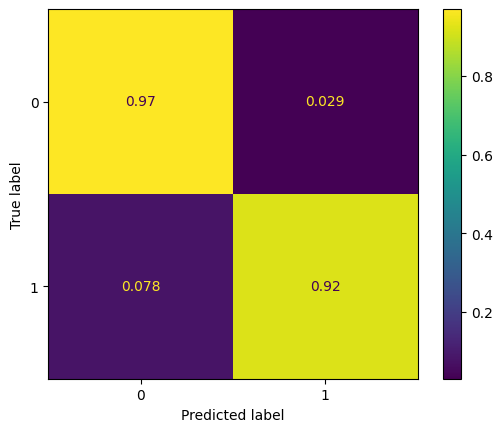

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
plt.show()

In [23]:
# Preprocess the new test documents using the preprocess_text_spacy function defined previously
def preprocess_docs(docs):
    return [" ".join(preprocess_text_spacy(doc)) for doc in docs]

# New test documents
test_docs = [
    "@CNN The weather forecast predicts sunshine and clear skies for tomorrow.",
    "I enjoy reading books and spending time in nature #selflove.",
    "Spending my weekends relaxing at home with a good movie with @sarah.",
    "I can't stand those immigrants ruining our country fuck them!!!",
    "@melanie You damn broke bitch you should die LOL"
]

# Apply preprocessing to the test documents
preprocessed_docs = preprocess_docs(test_docs)

# Vectorize the preprocessed test documents
# Note: Ensure that `vectorizer` is the CountVectorizer instance you fit on your training data
test_docs_vectorized = vectorizer.transform(preprocessed_docs)

# Predict using the SVC model
# Note: Ensure that `svc` is the trained SVC instance
y_pred = svc.predict(test_docs_vectorized)

# Output the predictions
class_map = {0: "Neutral", 1: "Offensive and Hate Speech"}
print("\nHate speech and offensive language detection algorithm.")
print("Model prediction:")
for doc, label in zip(test_docs, y_pred):
    print(f"'{doc}' \nPrediction: {class_map[label]}\n")



Hate speech and offensive language detection algorithm.
Model prediction:
'@CNN The weather forecast predicts sunshine and clear skies for tomorrow.' 
Prediction: Neutral

'I enjoy reading books and spending time in nature #selflove.' 
Prediction: Neutral

'Spending my weekends relaxing at home with a good movie with @sarah.' 
Prediction: Neutral

'I can't stand those immigrants ruining our country fuck them!!!' 
Prediction: Offensive and Hate Speech

'@melanie You damn broke bitch you should die LOL' 
Prediction: Offensive and Hate Speech

